# Matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = sns.load_dataset('tips')
print(data.to_string())

     total_bill    tip     sex smoker   day    time  size
0         16.99   1.01  Female     No   Sun  Dinner     2
1         10.34   1.66    Male     No   Sun  Dinner     3
2         21.01   3.50    Male     No   Sun  Dinner     3
3         23.68   3.31    Male     No   Sun  Dinner     2
4         24.59   3.61  Female     No   Sun  Dinner     4
5         25.29   4.71    Male     No   Sun  Dinner     4
6          8.77   2.00    Male     No   Sun  Dinner     2
7         26.88   3.12    Male     No   Sun  Dinner     4
8         15.04   1.96    Male     No   Sun  Dinner     2
9         14.78   3.23    Male     No   Sun  Dinner     2
10        10.27   1.71    Male     No   Sun  Dinner     2
11        35.26   5.00  Female     No   Sun  Dinner     4
12        15.42   1.57    Male     No   Sun  Dinner     2
13        18.43   3.00    Male     No   Sun  Dinner     4
14        14.83   3.02  Female     No   Sun  Dinner     2
15        21.58   3.92    Male     No   Sun  Dinner     2
16        10.3

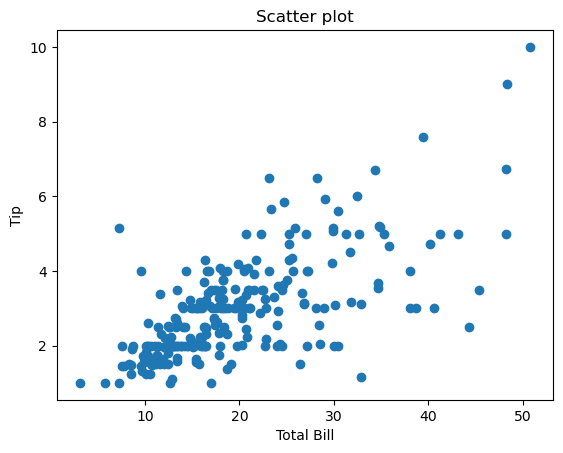

In [9]:
"""Scatter Plot with total against tip"""

plt.scatter(data['total_bill'],data['tip'])

###Adding title to plot
plt.title("Scatter plot")

###Setting the X & Y labels
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

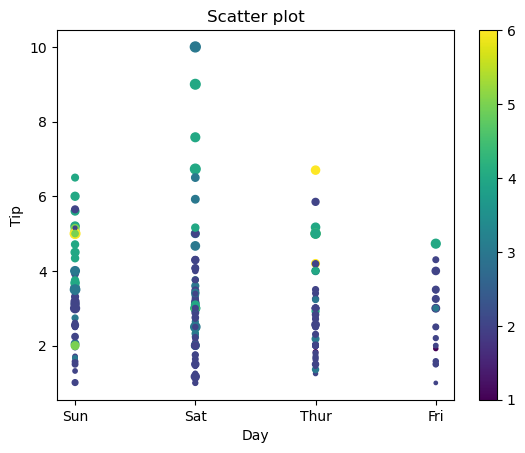

In [13]:
"""Scatter Plot with day against tip"""

plt.scatter(data['day'],data['tip'],c=data['size'],s=data['total_bill'])

###Adding title to plot
plt.title("Scatter plot")

###Setting the X & Y labels
plt.xlabel('Day')
plt.ylabel('Tip')
plt.colorbar()
plt.show()

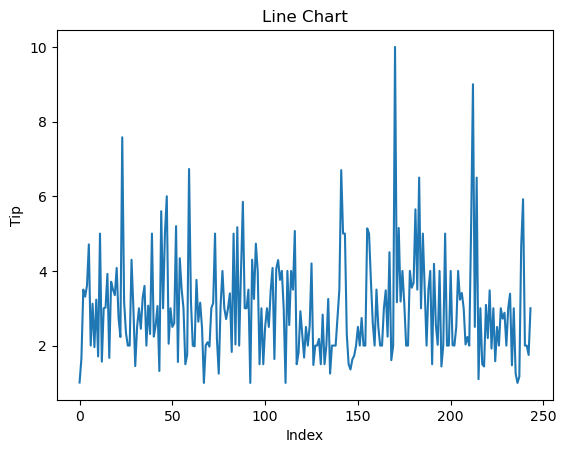

In [15]:
### Line plot with Day against Tip
plt.plot(data['tip'])
###Adding title to plot
plt.title("Line Chart")
###Setting the X & Y labels
plt.xlabel('Index')
plt.ylabel('Tip')
plt.show()

In [19]:
##Reading the database

bar_df = data.groupby('smoker').mean().reset_index()
bar_df

,smoker,total_bill,tip,size
0,Yes,20.756344,3.008710,2.408602
1,No,19.188278,2.991854,2.668874


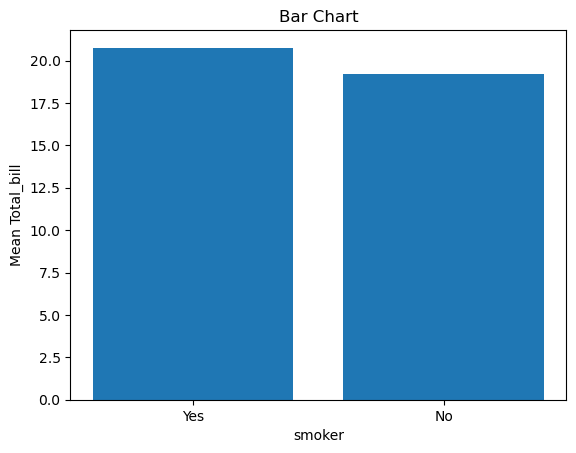

In [20]:
###Bar chart with day against tip
plt.bar(bar_df['smoker'],bar_df['total_bill'])
###Adding title to plot
plt.title("Bar Chart")
###Setting the X & Y labels
plt.xlabel('smoker')
plt.ylabel('Mean Total_bill')
plt.show()

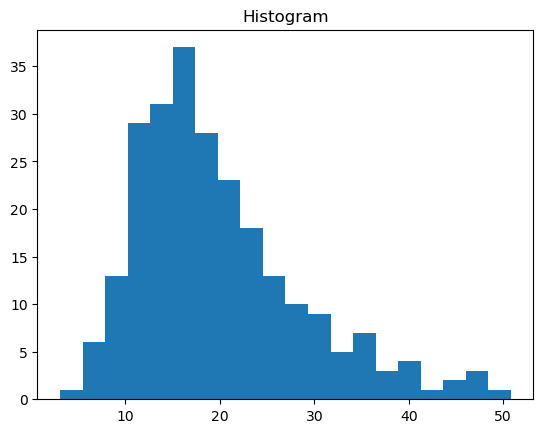

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
### Histogram of total_bills
plt.hist(data['total_bill'],bins=20)
plt.title("Histogram")
plt.show()

In [23]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


## ADVANCED VISUALIZATION

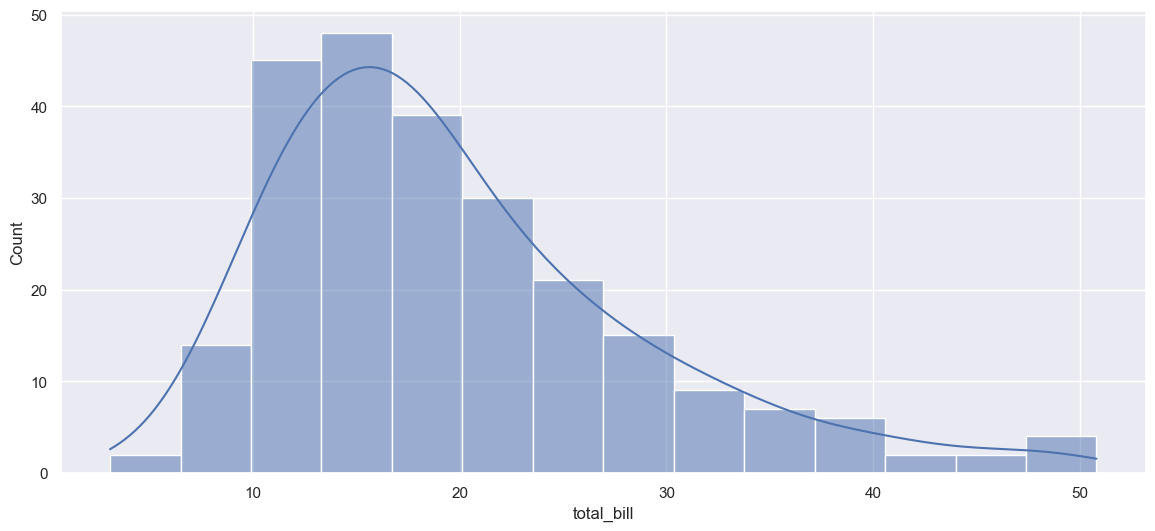

In [25]:
sns.set(rc={'figure.figsize':(14,6)})
ax = sns.histplot(x=data['total_bill'],kde=True)
plt.show()

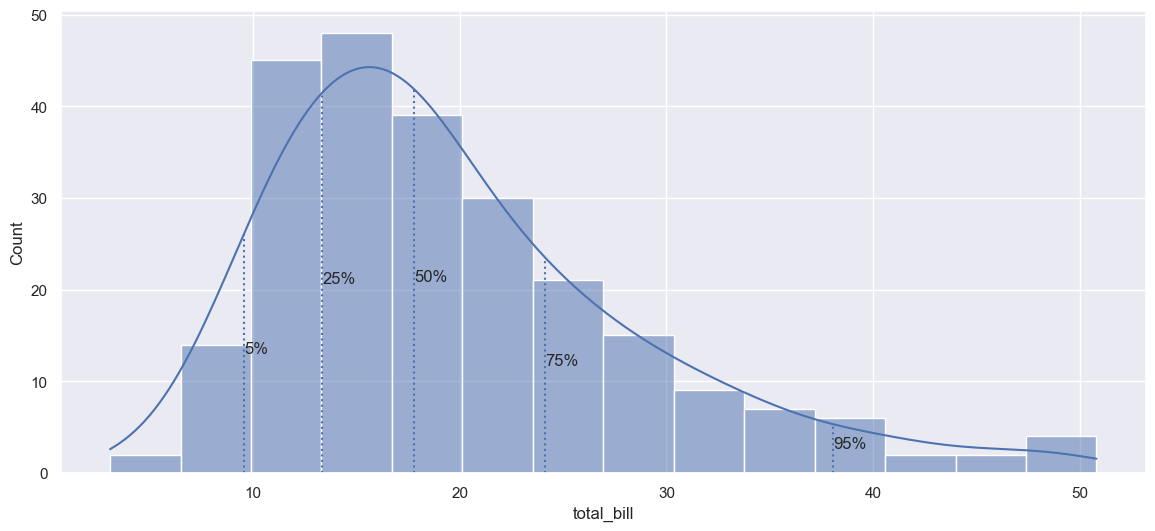

In [39]:

sns.set(rc={'figure.figsize':(14,6)})
ax = sns.histplot(x=data['total_bill'],kde=True)
quant_5 = data['total_bill'].quantile(0.05)
quant_25 = data['total_bill'].quantile(0.25)
quant_50 = data['total_bill'].quantile(0.50)
quant_75 = data['total_bill'].quantile(0.75)
quant_95 = data['total_bill'].quantile(0.95)
quant_dict = {'5%': quant_5,'25%': quant_25,'50%': quant_50,'75%': quant_75,'95%': quant_95}
kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

for key, value in quant_dict.items():
    height = np.interp(value,xs,ys)
    ax.vlines(value,0,height,ls = ':')
    ax.text(value, height*0.5,key,rotation=0)
plt.show()

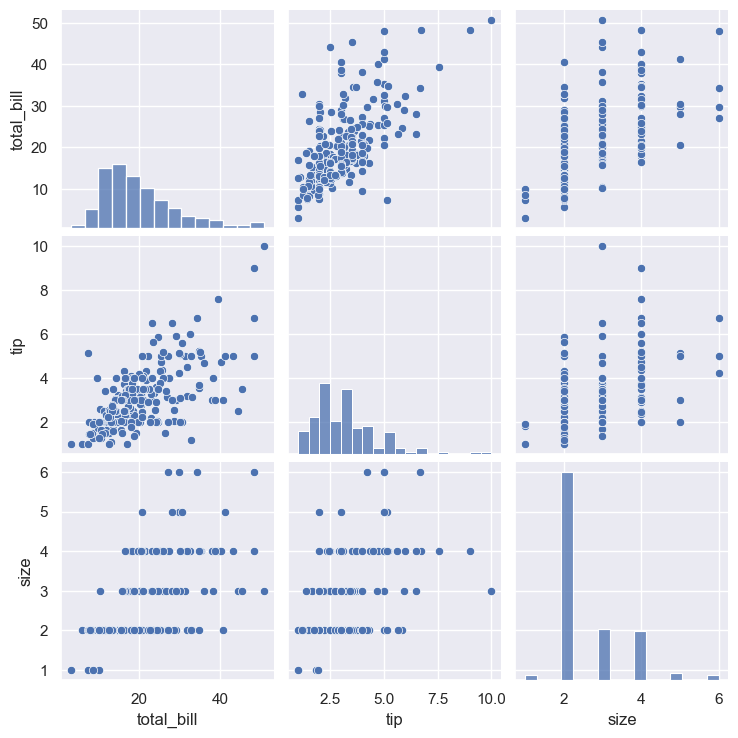

In [40]:
sns.pairplot(data)
plt.show()

In [41]:
data.value_counts('smoker')

smoker
No     151
Yes     93
dtype: int64

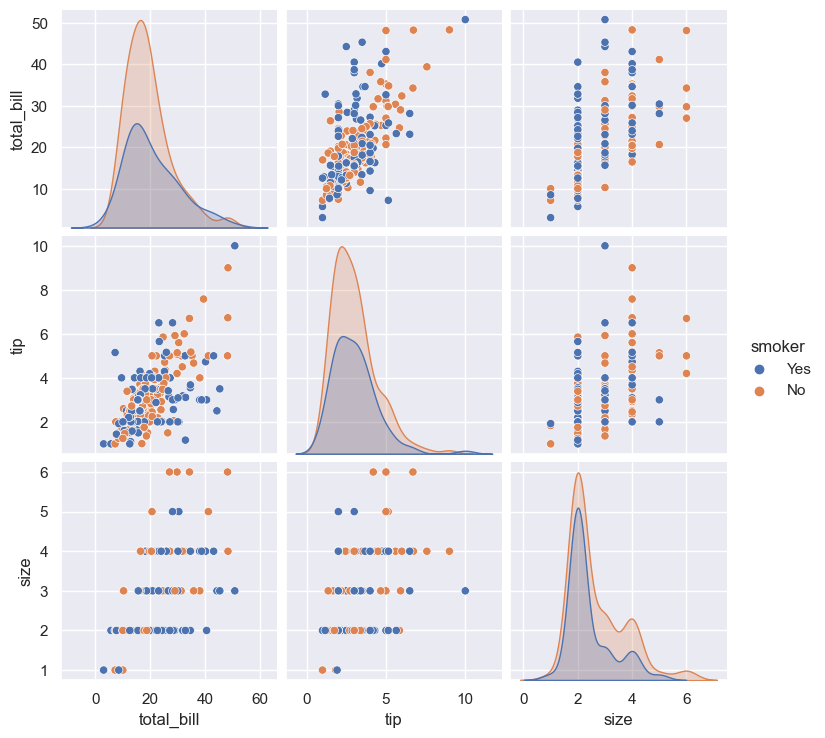

In [43]:
sns.pairplot(data,hue='smoker')
plt.show()

## Linear Regression With Distributions:-

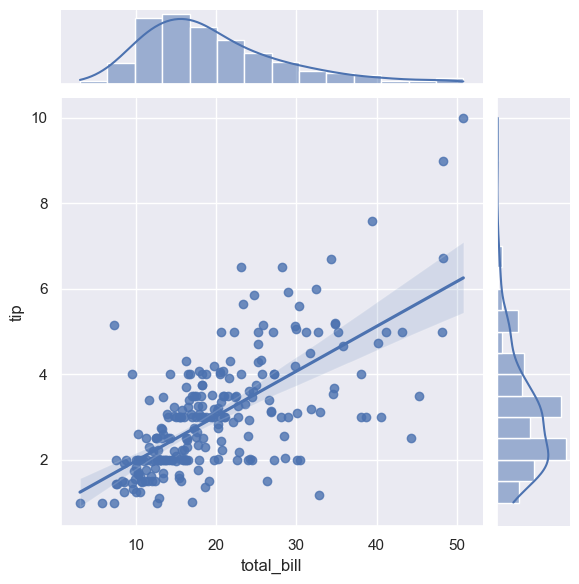

In [45]:
sns.jointplot(x="total_bill",y="tip",data=data,kind="reg")

## Box Plot (Outline Checking)

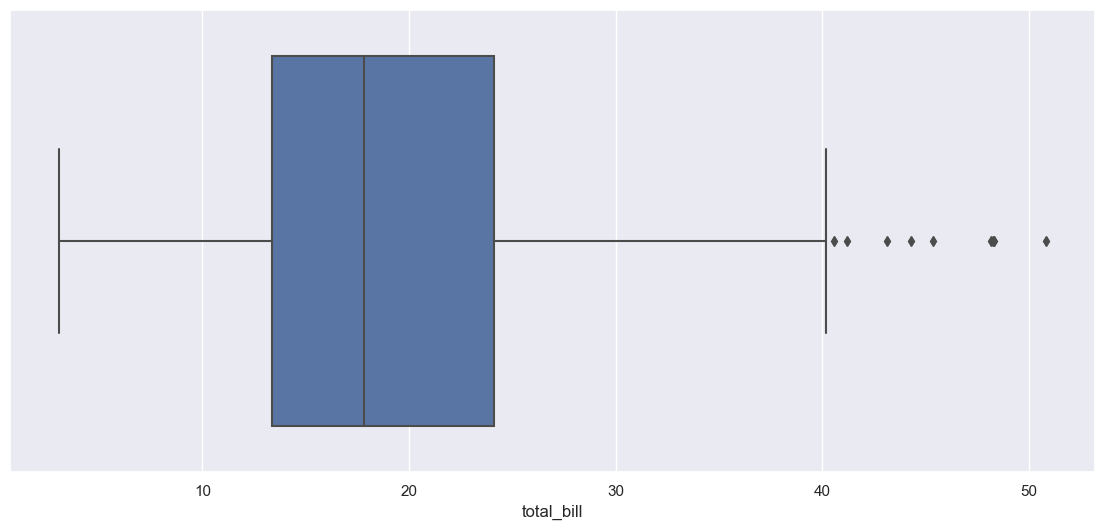

In [46]:
sns.boxplot(x=data["total_bill"])
plt.show()

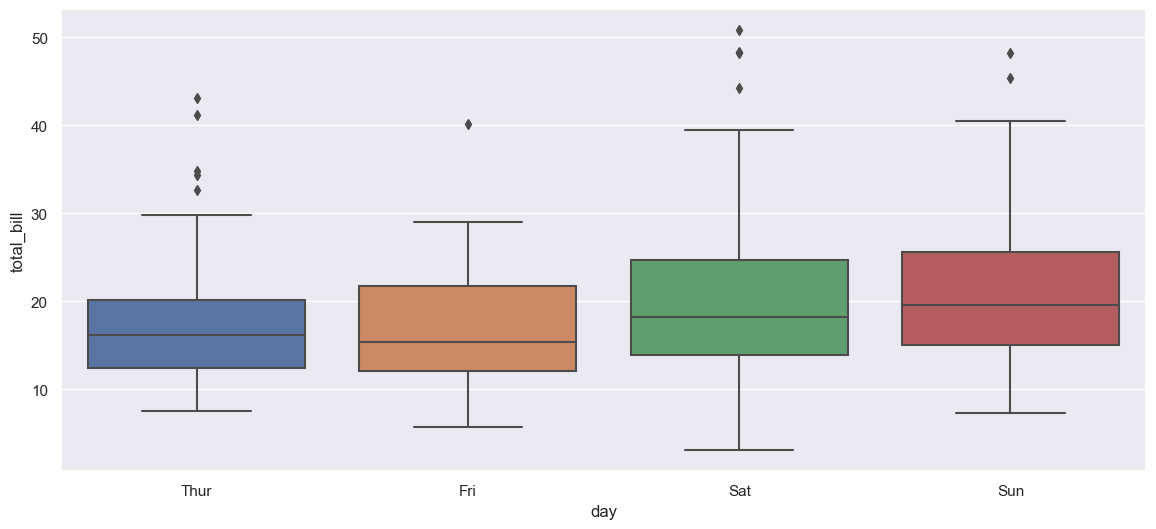

In [48]:
sns.boxplot(x="day",y="total_bill",data=data)
plt.show()

## Heatmap

In [51]:
"""Load the example flights dataset & convert to long_form"""

flights_long = sns.load_dataset("flights")
flights_long

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [53]:
flights = flights_long.pivot("month","year","passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


## Draw a heatmap with the numerical values in each map

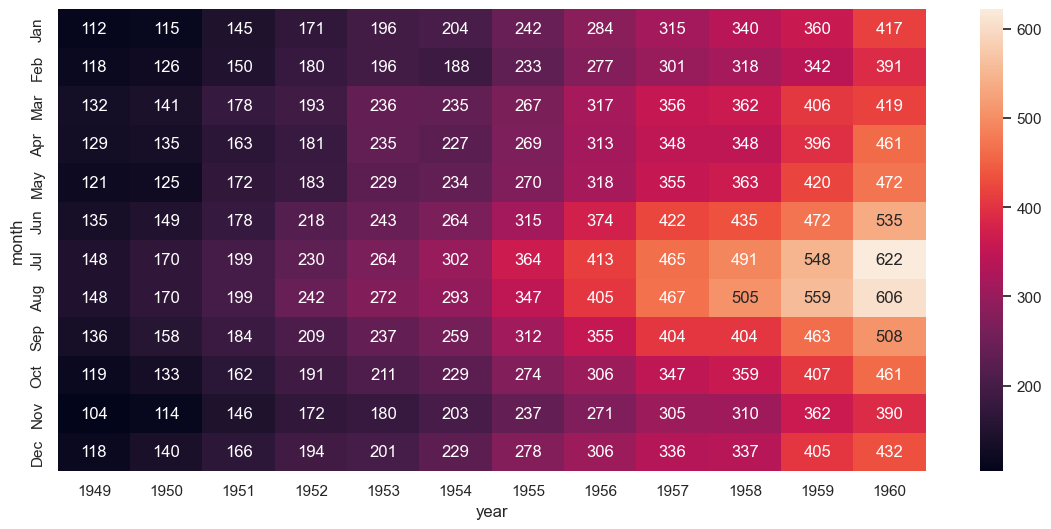

In [59]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
# Draw a heatmap with the numeric values in each cell
# f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(flights, annot=True, fmt=".0f")
plt.show()